<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-6/blob/main/Homework_6_Problem_3_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6
#Problem 3-a
#Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, f1_score
import time
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load CIFAR-10 dataset to calculate mean and std
train_dataset = torchvision.datasets.CIFAR10('../data-unversioned/p1ch7/', train=True, download=True)
val_dataset = torchvision.datasets.CIFAR10('../data-unversioned/p1ch7/', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label = train_dataset[100]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 8, 'ship')

In [ ]:
len(train_dataset)

50000

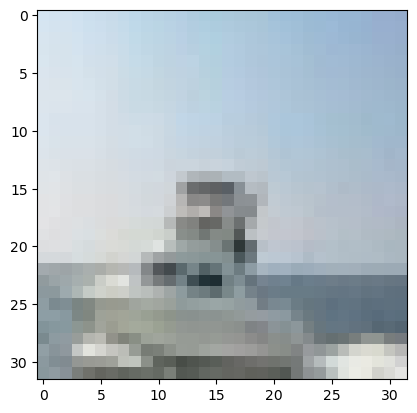

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10('../data-unversioned/p1ch7/', train=True, download=False,
                          transform=transforms.ToTensor())
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

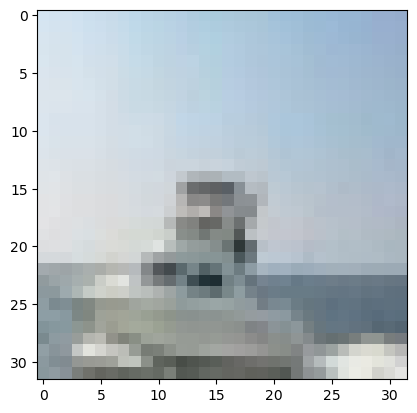

In [ ]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [ ]:
train_mean=imgs.view(3, -1).mean(dim=1)
train_std=imgs.view(3, -1).std(dim=1)
print(train_mean)
print(train_std)


tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [ ]:
transforms.Normalize(train_mean, train_std)


Normalize(mean=tensor([0.4914, 0.4822, 0.4465]), std=tensor([0.2470, 0.2435, 0.2616]))

In [ ]:
transformed_train_dataset = torchvision.datasets.CIFAR10(
    '../data-unversioned/p1ch7/', train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(train_mean,
                             train_std)
    ]))
train_loader = torch.utils.data.DataLoader(transformed_train_dataset, batch_size=64, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(32 * 32 * 3, 256),
    nn.Tanh(),
    nn.Linear(256, 10),
).to(device)

Epoch:0, Train Loss:1.717411
Epoch:1, Train Loss:1.712693
Epoch:2, Train Loss:1.754371
Epoch:3, Train Loss:1.397188
Epoch:4, Train Loss:1.381061
Epoch:5, Train Loss:1.275241
Epoch:6, Train Loss:1.325076
Epoch:7, Train Loss:1.684379
Epoch:8, Train Loss:1.622948
Epoch:9, Train Loss:1.150129
Epoch:10, Train Loss:1.232101
Epoch:11, Train Loss:1.297036
Epoch:12, Train Loss:1.207410
Epoch:13, Train Loss:1.900682
Epoch:14, Train Loss:1.597301
Epoch:15, Train Loss:1.316749
Epoch:16, Train Loss:1.621132
Epoch:17, Train Loss:0.934046
Epoch:18, Train Loss:1.316701
Epoch:19, Train Loss:1.278744
Epoch:20, Train Loss:0.996391
Epoch:21, Train Loss:1.186683
Epoch:22, Train Loss:1.261282
Epoch:23, Train Loss:0.924378
Epoch:24, Train Loss:0.847278
Epoch:25, Train Loss:0.854242
Epoch:26, Train Loss:0.774661
Epoch:27, Train Loss:1.139846
Epoch:28, Train Loss:1.539002
Epoch:29, Train Loss:0.862905
Epoch:30, Train Loss:0.931925
Epoch:31, Train Loss:0.977345
Epoch:32, Train Loss:0.723290
Epoch:33, Train Loss

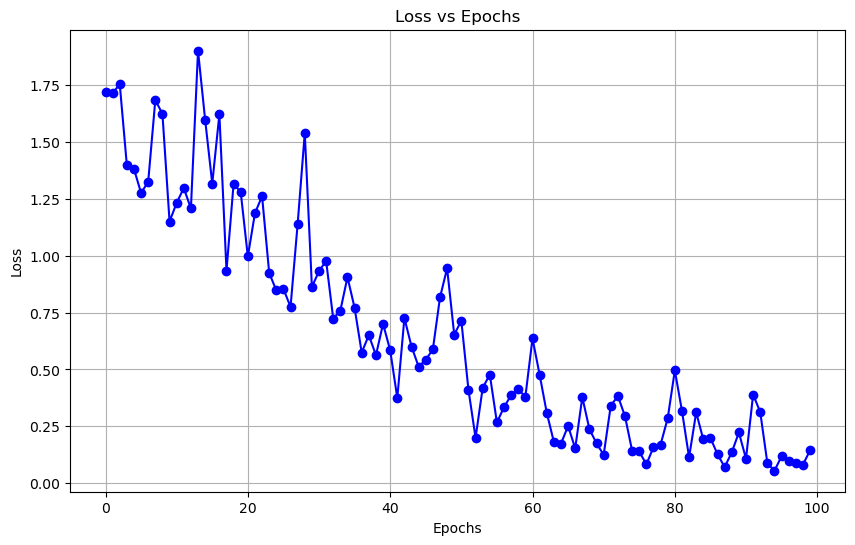

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Training loop
num_epochs = 100
total_start_time = time.time()
losses=[]
for epoch in range(num_epochs):
    start_time = time.time()
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        batch_size=imgs.shape[0]
        outputs=model(imgs.view(batch_size,-1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Calculate training time
    end_time = time.time()
    training_time = end_time - start_time
    print("Epoch:%d, Train Loss:%f" %(epoch,float(loss)))
    losses.append(float(loss))

# Print total training time
total_end_time = time.time()
total_training_time = total_end_time - total_start_time
print(f'Total Training Time: {total_training_time:.2f} seconds')

# Print total training time
total_end_time = time.time()
total_training_time = total_end_time - total_start_time
print(f'Total Training Time: {total_training_time:.2f} seconds')
# Plotting loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses, marker='o', linestyle='-', color='b')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
val_dataset = torchvision.datasets.CIFAR10('../data-unversioned/p1ch7/', train=False, download=False,
                          transform=transforms.ToTensor())

In [ ]:
imgs = torch.stack([img_t for img_t, _ in val_dataset], dim=3)
imgs.shape

torch.Size([3, 32, 32, 10000])

In [ ]:
val_mean=imgs.view(3, -1).mean(dim=1)
val_std=imgs.view(3, -1).std(dim=1)
print(val_mean)
print(val_std)


tensor([0.4942, 0.4851, 0.4504])
tensor([0.2467, 0.2429, 0.2616])


In [ ]:
transforms.Normalize(val_mean, val_std)

Normalize(mean=tensor([0.4942, 0.4851, 0.4504]), std=tensor([0.2467, 0.2429, 0.2616]))

In [ ]:
transformed_val_dataset = torchvision.datasets.CIFAR10(
    '../data-unversioned/p1ch7/', train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(train_mean,
                             train_std)
    ]))
val_loader = torch.utils.data.DataLoader(transformed_val_dataset, batch_size=64, shuffle=False)

In [ ]:
correct=0
total=0
with torch.no_grad():
  for imgs, labels in val_loader:
      imgs, labels = imgs.to(device), labels.to(device)
      batch_size=imgs.shape[0]
      outputs=model(imgs.view(batch_size,-1))
      _,predicted=torch.max(outputs,dim=1)
      total+=labels.shape[0]
      correct+=int((predicted==labels).sum())
print("Validation Accurracy:%f", correct/total)

Validation Accurracy:%f 0.4503


In [ ]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

In [ ]:
total_params, trainable_params = get_model_size(model)
print(f"  Total parameters: {total_params}")
print(f"  Trainable parameters: {trainable_params}")

  Total parameters: 789258
  Trainable parameters: 789258
